In [17]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib.scimath import sqrt as csqrt
import warnings
warnings.filterwarnings("ignore")

In [2]:
L = 1e-3
r_max = 0.8
lambda_ress = 1550e-9
neff = 1.447

c = 299792458
dlambda = np.linspace(lambda_ress - 2e-9, lambda_ress + 2e-9, 40000)

av_sigma = 0

dneff ac = 0.000712261337882327
dneff dc = 0.0


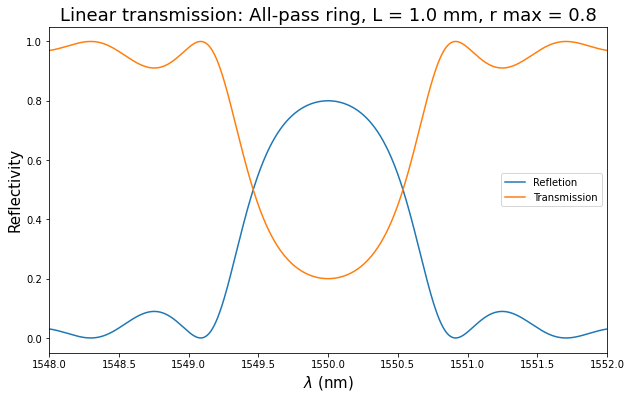

In [7]:
drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
sigma = av_sigma + drc_delta
# rmax = tanh²(kappa*L)
kappa = np.arctanh(np.sqrt(r_max))/L
# r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))


dneff_ac = kappa*lambda_ress/np.pi
print('dneff ac = ' + str(dneff_ac))
dneff_dc = av_sigma*lambda_ress/(2*np.pi)
print('dneff dc = ' + str(dneff_dc))


plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, refl)
plt.plot(dlambda*1e9, 1-refl)
# plt.axhline(y = 10*np.log10(1/2))
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity',fontsize =15)
plt.title(r'Linear transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

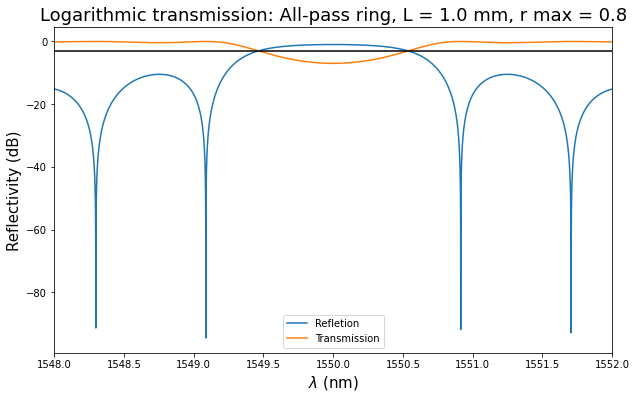

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, 10*np.log10(refl))
plt.plot(dlambda*1e9, 10*np.log10(1-refl))
plt.axhline(y = 10*np.log10(1/2), color = 'black')
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity (dB)',fontsize =15)
plt.title(r'Logarithmic transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

L = 0.002, r_max = 0.1:
dneff ac = 8.077873054098734e-05
dneff dc = 0.0

L = 0.004, r_max = 0.1:
dneff ac = 4.038936527049367e-05
dneff dc = 0.0

L = 0.002, r_max = 0.4:
dneff ac = 0.0001839070603489284
dneff dc = 0.0

L = 0.004, r_max = 0.4:
dneff ac = 9.19535301744642e-05
dneff dc = 0.0

L = 0.002, r_max = 0.75:
dneff ac = 0.0003248805566662116
dneff dc = 0.0

L = 0.004, r_max = 0.75:
dneff ac = 0.0001624402783331058
dneff dc = 0.0



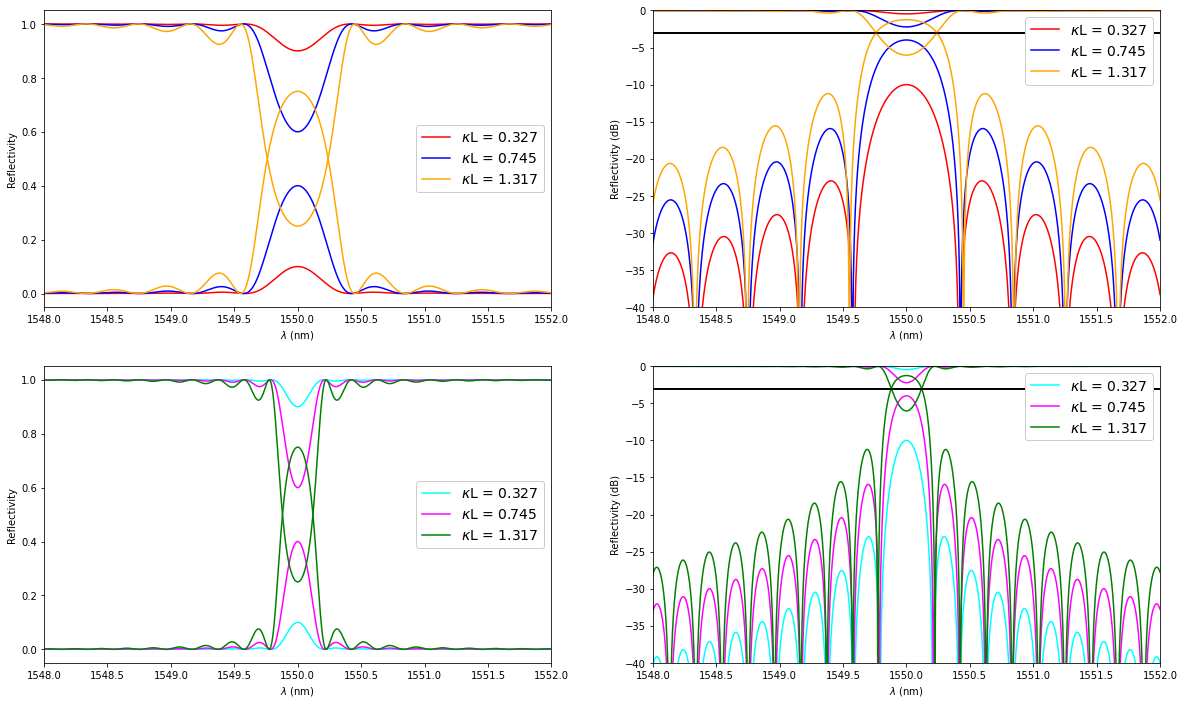

In [8]:
L_range = [2e-3, 4e-3]
r_max_range = [0.1, 0.4, 0.75]
colors = ['red', 'cyan', 'blue', 'magenta', 'orange', 'green']
j = 0

fig12, ax = plt.subplots(2, 2, figsize=(20,12))
for r_max in r_max_range:
  for i in range(2):
    L = L_range[i]

    drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
    sigma = av_sigma + drc_delta
    # rmax = tanh²(kappa*L)
    kappa = np.arctanh(np.sqrt(r_max))/L

    print('L = ' + str(L) + ', r_max = ' + str(r_max) + ':')
    dneff_ac = kappa*lambda_ress/np.pi
    print('dneff ac = ' + str(dneff_ac))
    dneff_dc = av_sigma*lambda_ress/(2*np.pi)
    print('dneff dc = ' + str(dneff_dc) + '\n')

    # r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
    refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))

    ax[i][0].plot(dlambda*1e9,refl, label = '$\kappa$'+'L = '+str(round(kappa*L, 3)), color = colors[j])
    ax[i][0].plot(dlambda*1e9,1-refl, color = colors[j])
    ax[i][0].set_xlabel('$\lambda$ (nm)')
    ax[i][0].set_ylabel('Reflectivity')
    ax[i][0].set_xlim([1548, 1552])
    ax[i][0].legend(framealpha = 1, fontsize = 14)

    ax[i][1].plot(dlambda*1e9,10*np.log10(refl), label = '$\kappa$'+'L = '+str(round(kappa*L, 3)), color = colors[j])
    ax[i][1].plot(dlambda*1e9,10*np.log10(1-refl), color = colors[j])
    ax[i][1].axhline(y = 10*np.log10(1/2), color = 'black')
    ax[i][1].set_xlim([1548, 1552])
    ax[i][1].set_ylim([-40, 0])
    ax[i][1].set_xlabel('$\lambda$ (nm)')
    ax[i][1].set_ylabel('Reflectivity (dB)')
    ax[i][1].legend(framealpha = 1, fontsize = 14)
    j = j + 1

## INTERCONNECT simulation

In [ ]:
import os
import imp
import sys
import importlib.util

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname("C:/Users/Victor Hugo/Desktop/i'm a robot/aulas/p8/temporario"))
spec_win.loader.exec_module(lumapi)

In [ ]:
bragg = lumapi.INTERCONNECT(filename='bragg_tests.icp', hide=False) 

: 

: 

###### Failed to open INTERCONNECT through VSCode, so initially I'll do it manually

In [ ]:
# L = 1e-3
# r_max = 0.8


In [ ]:
# L = 2e-3
# r_max = 0.4

## Week 2

In [18]:
import os
import imp
import sys
import pandas as pd
from IPython.display import display, Math

###############################################################
# LINUX PATH

sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname("/home/trainner/Documentos/Vh/braggs-grating-photonics/simulation")) #Current directory

In [20]:
bragg = lumapi.MODE(filename='simulations_MODE.lms')

In [4]:
lamb = 1530e-9
Dlamb = 25e-9
neff = 2.272
ng = 4.596
c = 299792458
dlambda = np.linspace(lamb - 2e-9, lamb + 2e-9, 40000)

In [16]:
period = lamb/(2*neff)
N = 120
length = period*N
print("period = " + str(period*1e9) + " nm")
kappa = np.sqrt((np.pi*ng*Dlamb/(lamb**2))**2 - (np.pi/length)**2)
print("kappa = " + str(kappa))
r_max = np.tanh(kappa*length)**2
print("r_max = " + str(r_max))
dneff = lamb*kappa/2
print("dneff = " + str(dneff))

period = 336.7077464788733 nm
kappa = 133163.23995736433
r_max = 0.9999151521350916
dneff = 0.1018698785673837


In [ ]:
L = 1e-3
r_max = 0.8
lambda_ress = 1550e-9
neff = 1.447

c = 299792458
dlambda = np.linspace(lambda_ress - 2e-9, lambda_ress + 2e-9, 40000)

av_sigma = 0

dneff ac = 0.000712261337882327
dneff dc = 0.0


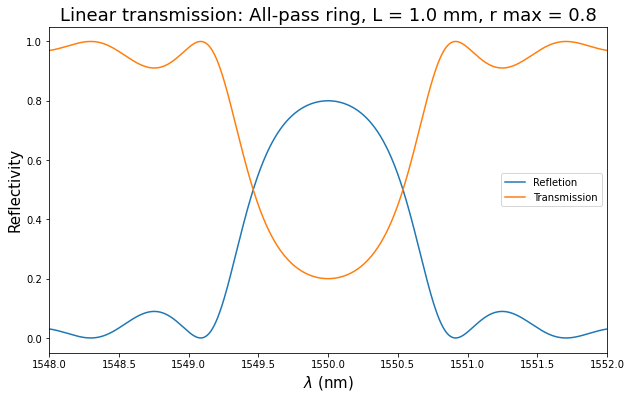

In [ ]:
drc_delta = 2*np.pi*neff*((1/dlambda)-(1/lambda_ress))
sigma = av_sigma + drc_delta
# rmax = tanh²(kappa*L)
kappa = np.arctanh(np.sqrt(r_max))/L
# r = sinh²(srqt(kappa² - sigma²)*L)/(cosh²(srqt(kappa² - sigma²)*L) - (sigma²/kappa²))
refl = (np.sinh(csqrt(kappa**2 - sigma**2)*L)**2) / ((np.cosh(csqrt(kappa**2 - sigma**2)*L)**2) - ((sigma**2)/(kappa**2)))


dneff_ac = kappa*lambda_ress/np.pi
print('dneff ac = ' + str(dneff_ac))
dneff_dc = av_sigma*lambda_ress/(2*np.pi)
print('dneff dc = ' + str(dneff_dc))


plt.figure(figsize = (10, 6))
plt.plot(dlambda*1e9, refl)
plt.plot(dlambda*1e9, 1-refl)
# plt.axhline(y = 10*np.log10(1/2))
plt.xlim(1548,1552)
plt.xlabel('$\lambda$ (nm)',fontsize =15)
plt.ylabel('Reflectivity',fontsize =15)
plt.title(r'Linear transmission: All-pass ring, L = {} mm, r max = {}'.format(L*1e3,r_max),fontsize =18)
plt.legend(['Refletion','Transmission'])

## MODE simulations

In [29]:
Altura = 220e-9
Largura = 450e-9
periodo = 336.7e-9
dLarg = 50e-9
material = "Si (Silicon) - palik"
type2 = 1

In [30]:
nSimu = 6
deltaLarg = np.linspace(000e-9, 250e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])


In [34]:
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))



Completed: 0/6
Completed: 1/6
Completed: 2/6
Completed: 3/6


LumApiError: "in getdata, the d-card named FDE::data::mode1 was not found.\n  Try the command '?getdata;' to see which d-cards are available."

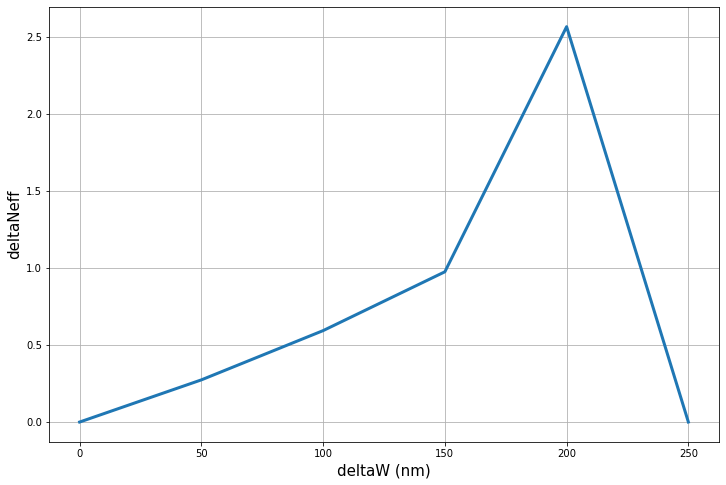

In [38]:

plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')


In [39]:
nSimu = 11
deltaLarg = np.linspace(000e-9, 50e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))


Completed: 0/11
Completed: 1/11
Completed: 2/11
Completed: 3/11
Completed: 4/11
Completed: 5/11
Completed: 6/11
Completed: 7/11
Completed: 8/11
Completed: 9/11
Completed: 10/11


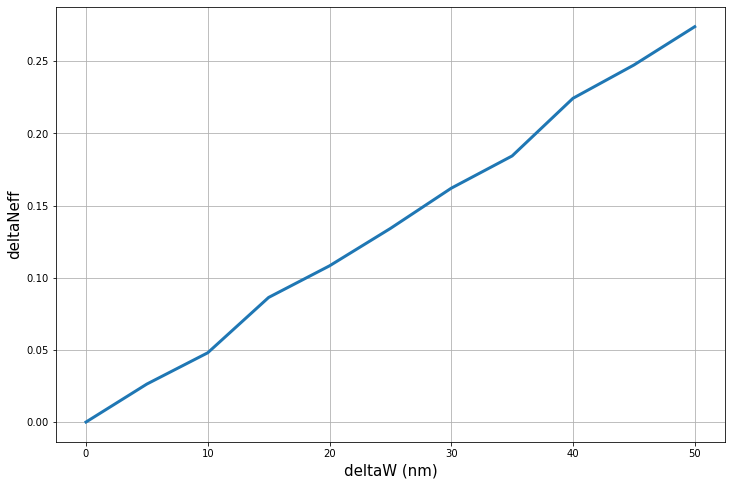

In [40]:
plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

In [41]:
nSimu = 6
deltaLarg = np.linspace(15e-9, 20e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))


Completed: 1/6
Completed: 2/6
Completed: 3/6
Completed: 4/6
Completed: 5/6
Completed: 6/6


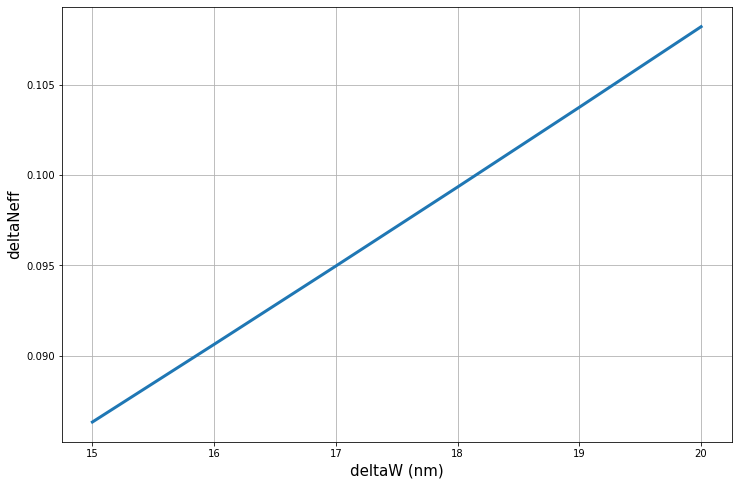

In [42]:
plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

In [43]:
nSimu = 11
deltaLarg = np.linspace(18e-9, 19e-9, nSimu)

# bragg.setnamed("structure group", "dLarg", deltaLarg[i])
deltaNeff = np.zeros(nSimu)
for i in range(nSimu):
    bragg.switchtolayout()
    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    bragg.setnamed("FDE", "x", periodo/8)
    bragg.findmodes()
    deltaNeff[i] = np.real(bragg.getdata('FDE::data::mode1','neff'))
    
    bragg.switchtolayout()
    bragg.setnamed("FDE", "x", periodo/2)
    bragg.findmodes()
    deltaNeff[i] = deltaNeff[i] - np.real(bragg.getdata('FDE::data::mode1','neff'))
    print("Completed: " + str(i+1) + "/" + str(nSimu))


Completed: 1/11
Completed: 2/11
Completed: 3/11
Completed: 4/11
Completed: 5/11
Completed: 6/11
Completed: 7/11
Completed: 8/11
Completed: 9/11
Completed: 10/11
Completed: 11/11


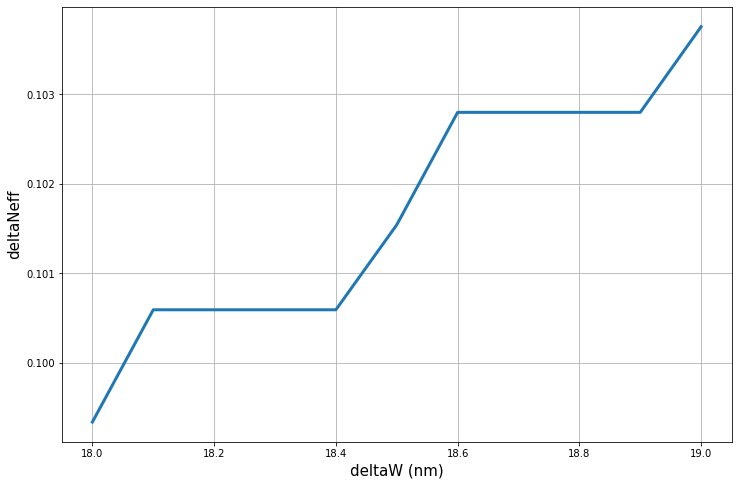

In [44]:
plt.figure(figsize = (12,8))
plt.plot(deltaLarg*1e9, deltaNeff, linewidth = 3)
# plt.ylim(-1, 0)
plt.xlabel('deltaW (nm)', fontsize = 15)
plt.ylabel('deltaNeff', fontsize = 15)
plt.grid(True)
plt.show()
# plt.savefig('Imagens/Loss x Box span')

In [45]:
Altura = 220e-9
Largura = 450e-9
periodo = 336.7e-9
dLarg = 18.4e-9
material = "Si (Silicon) - palik"
type2 = 1

In [ ]:

bragg.setnamed("EME", "number of periodic groups", 3)
bragg.setnamed("EME", "start cell group", np.transpose([1, 2, 5]))
bragg.setnamed("EME", "end cell group", np.transpose([1, 4, 5]))
bragg.setnamed("EME", "periods", np.transpose([1, 120, 1]))

315
461
1.5315e-06
1.5461e-06
Dlamb = 14.599999999999826 nm
lamb = 1538.8 nm


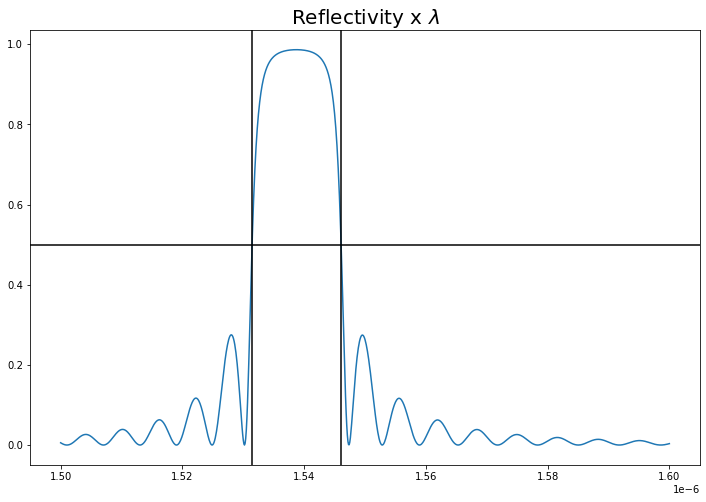

In [79]:
sweepResultMatrix = bragg.getemesweep("S_wavelength_sweep")
plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

for i in range(1001):
    if abs(sweepResultMatrix['s11'][i])**2 > 0.5:
        print(i)
        break
for i in range(315, 1001):
    if abs(sweepResultMatrix['s11'][i])**2 < 0.5:
        print(i)
        break

lambL = sweepResultMatrix['wavelength'][315][0]
lambH = sweepResultMatrix['wavelength'][461][0]
plt.axvline(x = lambL, color = 'black')
plt.axvline(x = lambH, color = 'black')

print('Dlamb = ' + str((lambH - lambL)*1e9) + " nm")
print('lamb = ' + str((lambH + lambL)*0.5e9) + " nm")

Text(0.5, 1.0, 'Reflectivity x $\\lambda$')

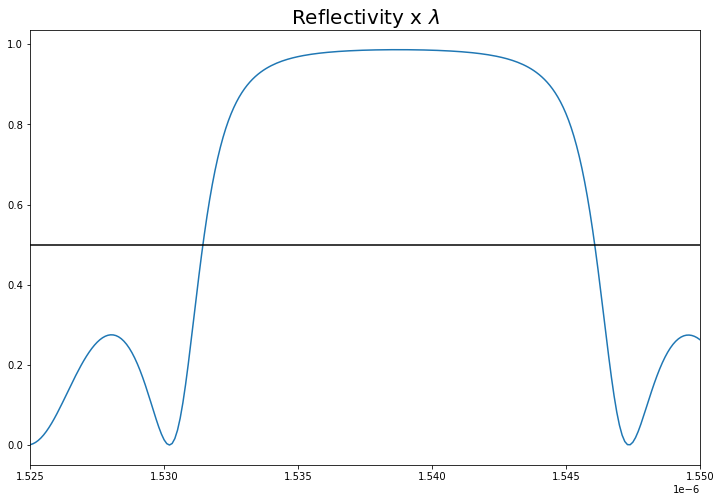

In [83]:

plt.figure(figsize=(12, 8))
plt.plot(sweepResultMatrix['wavelength'],abs(sweepResultMatrix['s11'])**2)
plt.axhline(y = 1/2, color = 'black')
plt.xlim([1.525e-06, 1.55e-06])
# plt.xlim([1515e-9, 1545e-9])
plt.title(r"Reflectivity x $\lambda$",fontsize=20)

In [ ]:

for i in range(nSimu):
    bragg.switchtolayout()

    bragg.setnamed("structure group", "dLarg", deltaLarg[i])
    
    bragg.run()
    bragg.emepropagate()

    bragg.setemeanalysis('wavelength sweep', 1)
    bragg.setemeanalysis('start wavelength', 1.5e-6)
    bragg.setemeanalysis('stop wavelength', 1.6e-6)
    bragg.setemeanalysis('number of wavelength points', 100)

    bragg.emesweep('wavelength sweep')

    wave = bragg.getemesweep('S_wavelength_sweep')

    lmbd = wave['wavelength']*1e6

    s21[:,i] = abs(wave['s21'])**2
    s31[:,i] = abs(wave['s31'])**2
    s41[:,i] = abs(wave['s41'])**2

    print('Completed = {}/{}'.format(i+1,nSimu))